In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [15]:
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [13]:
# your code here
tri_state = [9,36,34]
df_tri = df[df['_STATE'].isin(tri_state)]

Now check to see how large our subset df.

In [14]:
# your code here
df_tri.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [15]:
# refer to the data dictionary to learn that 77, 88, and 99 are actually categorical info

df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [18]:
#change all the '88's to '0's
# 77 : nan
# 99 : nan

zero_dict = {88:0,
            77: np.nan,
            99: np.nan}
df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)


In [31]:
df['PHYSHLTH'].describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [64]:
# descriptive statistics
phys_hlth = df['PHYSHLTH']
descriptive = df['PHYSHLTH'].describe().drop('count')
x = list(descriptive.index)
descriptive

mean     4.085341
std      8.513293
min      0.000000
25%      0.000000
50%      0.000000
75%      3.000000
max     30.000000
Name: PHYSHLTH, dtype: float64

- add some labels! 

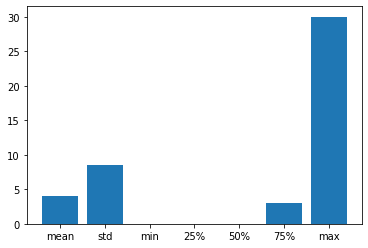

In [81]:
# graphic showing those descriptive stats
#plt.subplots(1,2, figsize=(8,6))
axes1 = plt.bar(x,descriptive)
#axes = plt.boxplot(descriptive)
plt.show()

- Add some labels to your boxplot, you silly goose!


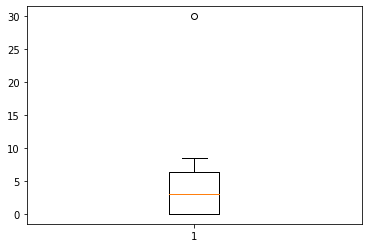

In [83]:
plt.boxplot(descriptive)
plt.show()

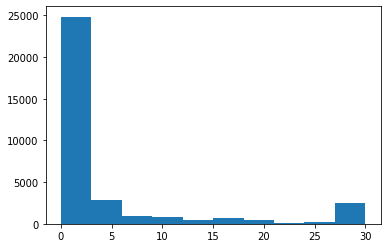

In [86]:
# graphic showing the distribution of data
# add some labels!
plt.hist(phys_hlth)
plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [120]:
# code to calculate the average number of sick days by state
avghlth_by_state = pd.DataFrame(df.groupby('_STATE').mean()['PHYSHLTH'])
states = avghlth_by_state.index.astype(str)

-  change your x-values to state names, add labels

<BarContainer object of 3 artists>

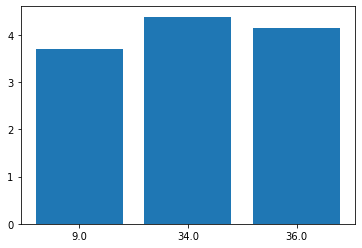

In [121]:
# code to graph those averages using matplotlib
# change your x-values to state names, add labels
plt.bar(states,avghlth_by_state['PHYSHLTH'])

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.

- how would you define 'chronically sick'?



In [257]:
##### code to create new colum for chronically sick
df['chronically_sick']=df['PHYSHLTH']>15
#sick = df[df['chronically_sick']==True][['_STATE','PHYSHLTH','chronically_sick']]
#healthy = df[df['chronically_sick']==False][['_STATE','PHYSHLTH','chronically_sick']]
parsed_df = df[['_STATE','PHYSHLTH','chronically_sick']]
parsed_df

,_STATE,PHYSHLTH,chronically_sick
49938,9.0,0.0,False
49939,9.0,0.0,False
49940,9.0,2.0,False
49941,9.0,0.0,False
49942,9.0,0.0,False
...,...,...,...
303774,36.0,0.0,False
303775,36.0,0.0,False
303776,36.0,6.0,False
303777,36.0,0.0,False


## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

- there are more values in the chronically sick column because there are some nan values in PHYSHLTH. Will this be a problem in analysis? I don't think so.

In [258]:
print(parsed_df.groupby('_STATE').count())
9515+898

        PHYSHLTH  chronically_sick
_STATE                            
9.0        10413             10588
34.0       11458             11708
36.0       11876             12249


10413

In [259]:
len(df[df['_STATE']==9])

10588

In [260]:
# code to calculate percentages per state
health_by_state = parsed_df.groupby(['_STATE','chronically_sick']).count()
health_by_state

PHYSHLTH
_STATE chronically_sick          
9.0    False                 9515
       True                   898
34.0   False                10217
       True                  1241
36.0   False                10742
       True                  1134

In [261]:
state_pcts = health_by_state.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
states = state_pcts.index.levels[0]
sick = state_pcts[np.in1d(state_pcts.index.get_level_values(1),[True])]
healthy = state_pcts[np.in1d(state_pcts.index.get_level_values(1),[False])]
sick['PHYSHLTH']
states = states.astype(str)
sick


,,PHYSHLTH
_STATE,chronically_sick,
9.0,True,8.623836
34.0,True,10.830861
36.0,True,9.548670


<BarContainer object of 3 artists>

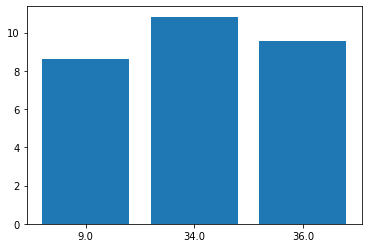

In [262]:
# create graphic to compare chronically sick by state
plt.bar(states,sick['PHYSHLTH'])

<BarContainer object of 3 artists>

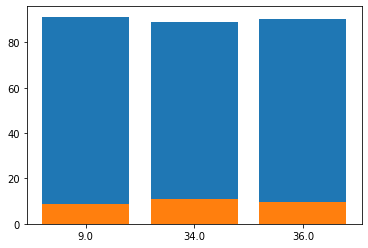

In [263]:
plt.bar(states,healthy['PHYSHLTH'])
plt.bar(states,sick['PHYSHLTH'])

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [264]:
df['everyday_smoker']=(df['SMOKDAY2']==1)


## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  